# Boston Housing Prices Analysis

In [1]:
#######################################
### Import Data Processing Packages ###
#######################################

import pandas            as pd;
import numpy             as np;
import seaborn           as sns;
import matplotlib.pyplot as plt;

%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

########################################
### Import Machine Learning Packages ###
########################################

from sklearn.preprocessing   import StandardScaler;
from sklearn.preprocessing   import PolynomialFeatures;

from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCVSearchCV;
from sklearn.metrics         import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error;

from sklearn.linear_model    import LinearRegression;
from sklearn.linear_model    import Ridge;
from sklearn.linear_model    import Lasso;

from sklearn.neighbors       import KNeighborsClassifier;
from sklearn.tree            import DecisionTreeClassifier;
from sklearn.ensemble        import RandomForestClassifier;
from sklearn.svm             import SVC;
from sklearn.cluster         import KMeans;
from sklearn.decomposition   import PCA;

from sklearn.pipeline import Pipeline;

########################
### Import Data Sets ###
########################

from sklearn                 import datasets;

In [2]:
# Read CSV File
boston = datasets.load_boston();

#cars = cars.replace(to_replace='vgood',   value=4);
#cars = cars.replace(to_replace='good',    value=3);
#cars = cars.replace(to_replace='acc',     value=2);
#cars = cars.replace(to_replace='unacc',   value=1);

#cars = cars.replace(to_replace='vhigh',   value=4);
#cars = cars.replace(to_replace='high',    value=3);
#cars = cars.replace(to_replace='med',     value=2);
#cars = cars.replace(to_replace='low',     value=1);

#cars = cars.replace(to_replace='small',   value=1);
#cars = cars.replace(to_replace='big',     value=1);

#cars = cars.replace(to_replace='5more',   value=5);

#cars = cars.replace(to_replace='more', value=6);

#cars = cars.convert_objects(convert_numeric=True)

In [3]:
# Check Head of Data
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [19]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7')

In [62]:
print(type(boston['feature_names']))
print(np.array(['target']))

print(np.append(boston['feature_names'], 'target'))

<class 'numpy.ndarray'>
['target']
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT' 'target']


In [5]:
# Convert to Pandas
df = pd.DataFrame(data=np.c_[boston['data'], boston['target']], columns=np.append(boston['feature_names'], 'target'))

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Check column names
list(df)

In [6]:
# Check column sizes and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
target     506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [7]:
# Check for null entries
df.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
target     False
dtype: bool

In [8]:
# Check dimensions of dataframe
df.shape

(506, 14)

In [30]:
# Inspect statistics of data
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


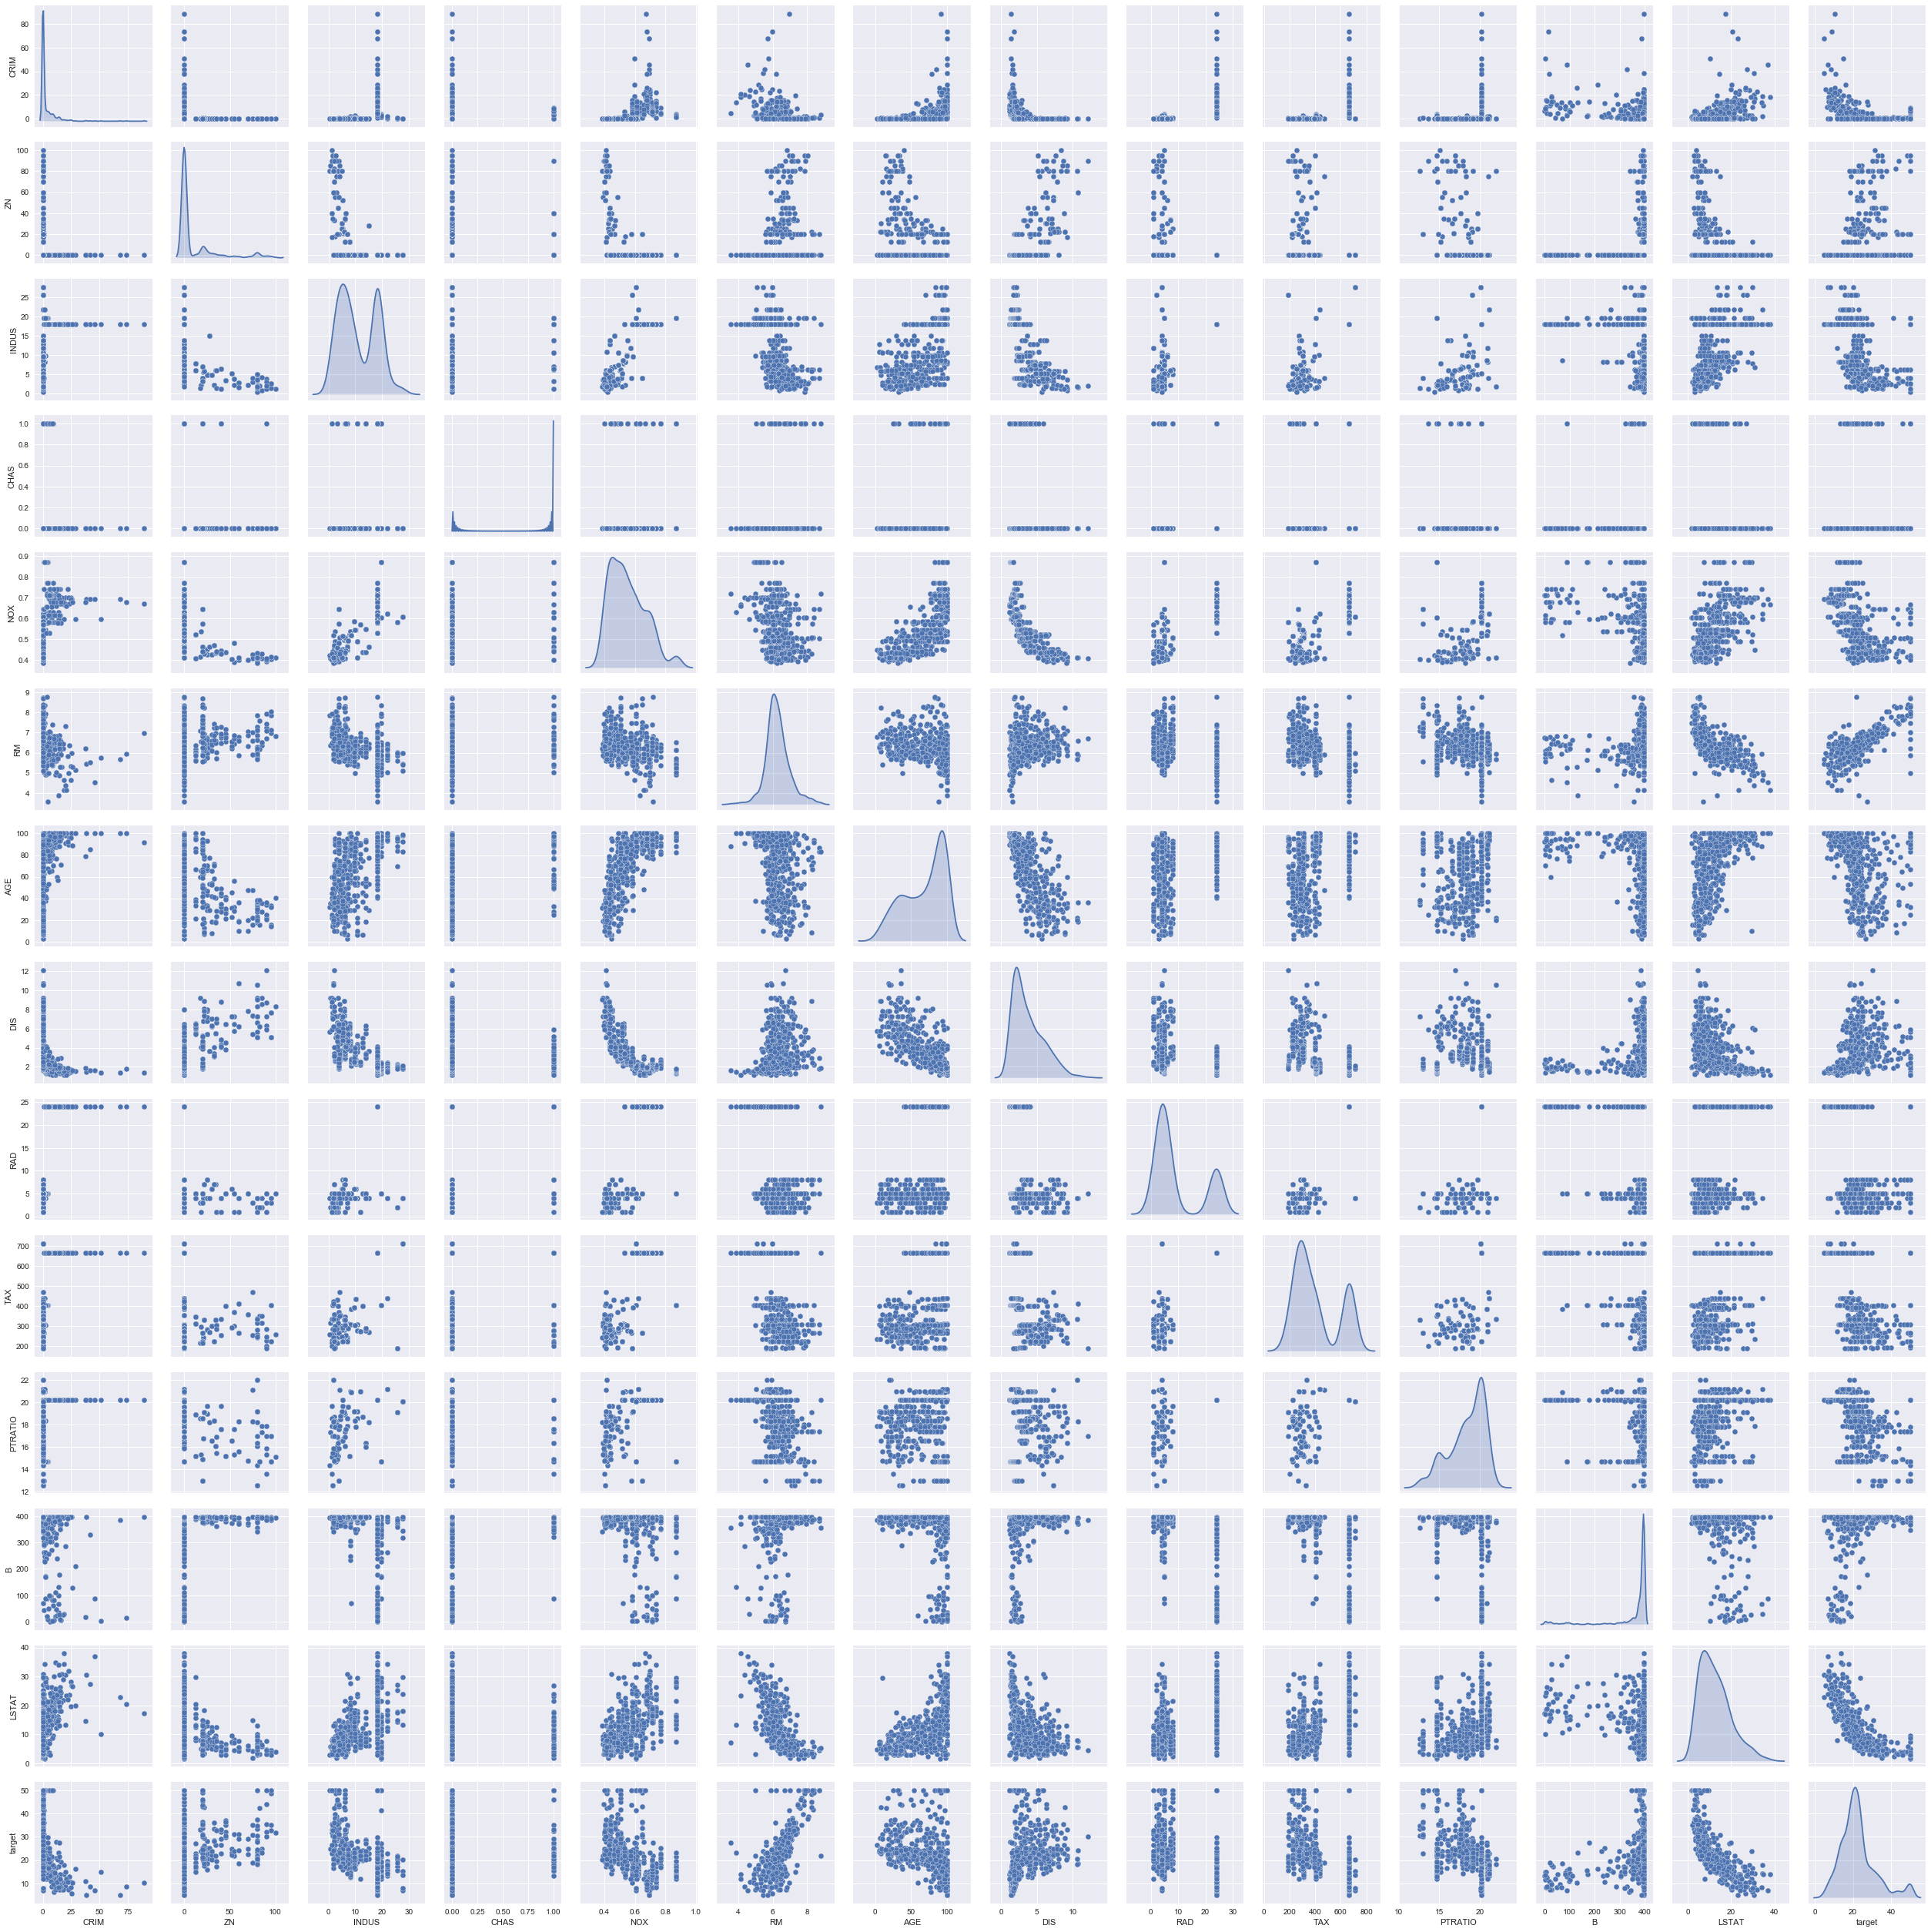

In [70]:
sns.pairplot(data=df, palette='plasma', diag_kind="kde", diag_kws=dict(shade=True))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DDEFF8CF98>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001DDF054C908>]], dtype=object)

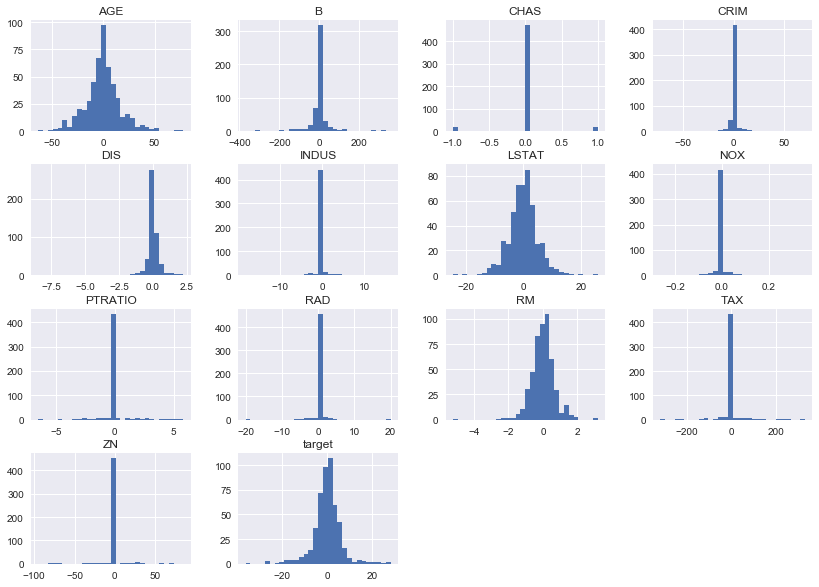

In [33]:
df.diff().hist(figsize=(14, 10), bins=30)

In [8]:
data = [
    go.Heatmap(
        z = df.corr(method='pearson').values,
        x = df.columns.values,
        y = df.columns.values,
        colorscale=[[0.0, 'rgb(165,0,38)'], [0.1111111111111111, 'rgb(215,48,39)'], [0.2222222222222222, 'rgb(244,109,67)'], [0.3333333333333333, 'rgb(253,174,97)'], [0.4444444444444444, 'rgb(254,224,144)'], [0.5555555555555556, 'rgb(224,243,248)'], [0.6666666666666666, 'rgb(171,217,233)'], [0.7777777777777778, 'rgb(116,173,209)'], [0.8888888888888888, 'rgb(69,117,180)'], [1.0, 'rgb(49,54,149)']],
        text = True ,
        opacity = 1.0,
        zmin = -1,
        zmax = 1
    )
]


layout = go.Layout(
    title='Pearson Correlation of all Nutritional metrics',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

# Learning

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.5);

# Linear Regression

In [31]:
scores = cross_val_score(lr, df.drop('target', axis=1), df['target'],  cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.35 (+/- 0.76)


Accuracy: 0.35 (+/- 0.76)


Train Test Split
MAE: 3.60789639186
MSE: 25.8695182685
RMSE: 5.08620863399


Cross Validation
MAE: 4.25334898987
MSE: 37.1739460217
RMSE: 6.09704403967


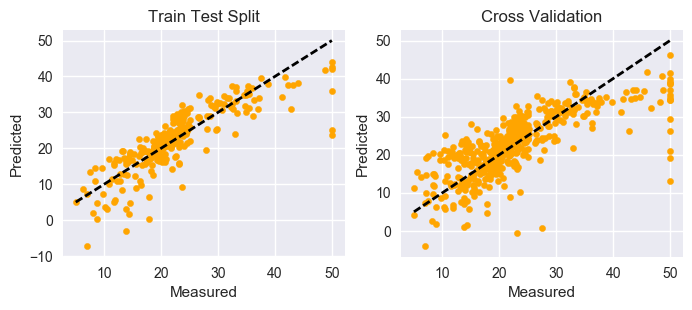

In [13]:
lr = LinearRegression();

lr.fit(X_train, y_train);

pred1 = lr.predict(X_test);
pred2 = cross_val_predict(lr, df.drop('target', axis=1), df['target'], cv=5)

scores = cross_val_score(lr, df.drop('target', axis=1), df['target'],  cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

fig  = plt.figure(figsize=(8, 3), dpi=100);

axes1 = fig.add_subplot(121); 
axes1.scatter(y_test, pred1, c='orange', s=20)
axes1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes1.set_title("Train Test Split")
axes1.set_xlabel('Measured')
axes1.set_ylabel('Predicted')

axes2 = fig.add_subplot(122); 
axes2.scatter(df['target'], pred2, c='orange', s=20)
axes2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes2.set_title("Cross Validation")
axes2.set_xlabel('Measured')
axes2.set_ylabel('Predicted')

print('\n')
print("Train Test Split")
print('MAE:',          mean_absolute_error(y_test, pred1))
print('MSE:',          mean_squared_error( y_test, pred1))
print('RMSE:', np.sqrt(mean_squared_error( y_test, pred1)))
print('\n')
print("Cross Validation")
print('MAE:',          mean_absolute_error(df['target'], pred2))
print('MSE:',          mean_squared_error( df['target'], pred2))
print('RMSE:', np.sqrt(mean_squared_error( df['target'], pred2)))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



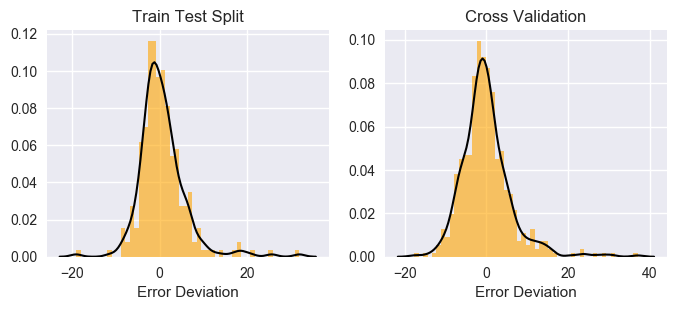

In [94]:
fig  = plt.figure(figsize=(8, 3), dpi=100);

axes1 = fig.add_subplot(121); 
axes2 = fig.add_subplot(122); 

sns.distplot((y_test-pred1),       bins=50, ax=axes1, axlabel='Error Deviation', kde_kws={"color": "k", "lw": 1.5}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});
sns.distplot((df['target']-pred2), bins=50, ax=axes2, axlabel='Error Deviation', kde_kws={"color": "k", "lw": 1.5}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});

axes1.set_title("Train Test Split")
axes2.set_title("Cross Validation")

In [68]:
coeffecients = pd.DataFrame(lr.coef_, df.drop('target', axis=1).columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
CRIM,-0.013037
ZN,0.055192
INDUS,0.066115
CHAS,2.043827
NOX,-15.554836
RM,4.594003
AGE,0.024725
DIS,-1.279950
RAD,0.275174
TAX,-0.014513


In [37]:
param_grid = [{'fit_intercept': [True, False],
              'normalize':     [True, False]}]

grid = GridSearchCV(lr, param_grid, cv=5)

grid.fit(X_train, y_train)

print(grid.cv_results_['mean_test_score'])

grid.best_estimator_

[ 0.73480814  0.73480814  0.70443527  0.70443527]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

# Ridge Regression

Train Test Split
MAE: 3.49605949827
MSE: 25.4030052842
RMSE: 5.04013941119


Cross Validation
MAE: 4.06688495625
MSE: 35.3744820134
RMSE: 5.94764508132


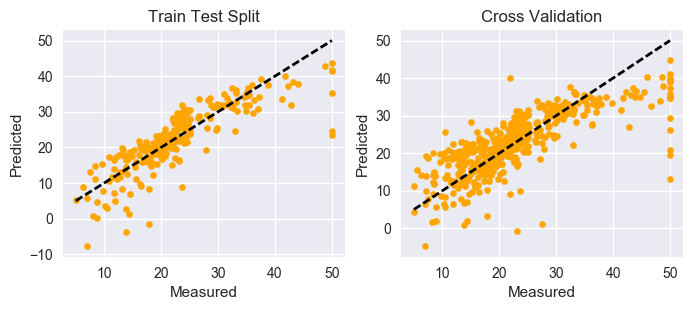

In [38]:
ridge = Ridge(alpha=0.9);

ridge.fit(X_train, y_train);

pred1 = ridge.predict(X_test);
pred2 = cross_val_predict(ridge, df.drop('target', axis=1), df['target'], cv=5)

fig  = plt.figure(figsize=(8, 3), dpi=100);

axes1 = fig.add_subplot(121); 
axes1.scatter(y_test, pred1, c='orange', s=20)
axes1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes1.set_title("Train Test Split")
axes1.set_xlabel('Measured')
axes1.set_ylabel('Predicted')

axes2 = fig.add_subplot(122); 
axes2.scatter(df['target'], pred2, c='orange', s=20)
axes2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes2.set_title("Cross Validation")
axes2.set_xlabel('Measured')
axes2.set_ylabel('Predicted')

print("Train Test Split")
print('MAE:',          mean_absolute_error(y_test, pred1))
print('MSE:',          mean_squared_error( y_test, pred1))
print('RMSE:', np.sqrt(mean_squared_error( y_test, pred1)))
print('\n')
print("Cross Validation")
print('MAE:',          mean_absolute_error(df['target'], pred2))
print('MSE:',          mean_squared_error( df['target'], pred2))
print('RMSE:', np.sqrt(mean_squared_error( df['target'], pred2)))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



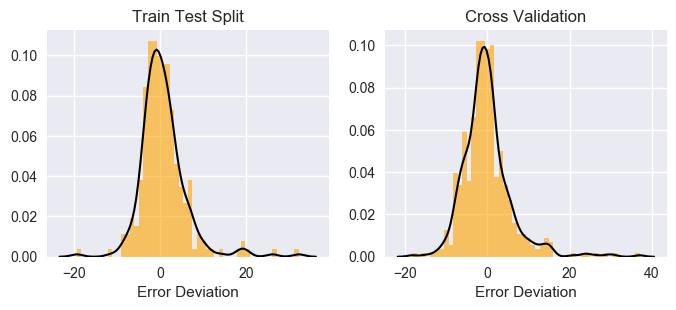

In [96]:
fig  = plt.figure(figsize=(8, 3), dpi=100);

axes1 = fig.add_subplot(121); 
axes2 = fig.add_subplot(122); 

sns.distplot((y_test-pred1),       bins=50, ax=axes1, axlabel='Error Deviation', kde_kws={"color": "k", "lw": 1.5}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});
sns.distplot((df['target']-pred2), bins=50, ax=axes2, axlabel='Error Deviation', kde_kws={"color": "k", "lw": 1.5}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});

axes1.set_title("Train Test Split")
axes2.set_title("Cross Validation")

In [39]:
param_grid = [{'fit_intercept': [True, False],
              'normalize':     [True, False]}]

grid = GridSearchCV(ridge, param_grid, cv=5)

grid.fit(X_train, y_train)

print(grid.cv_results_['mean_test_score'])

grid.best_estimator_

[ 0.6535216   0.72633344  0.70592457  0.70592457]


Ridge(alpha=0.9, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

# Lasso

Train Test Split
MAE: 3.48897614464
MSE: 25.9567145813
RMSE: 5.09477326103


Cross Validation
MAE: 3.98738263625
MSE: 34.8524387898
RMSE: 5.9035954121


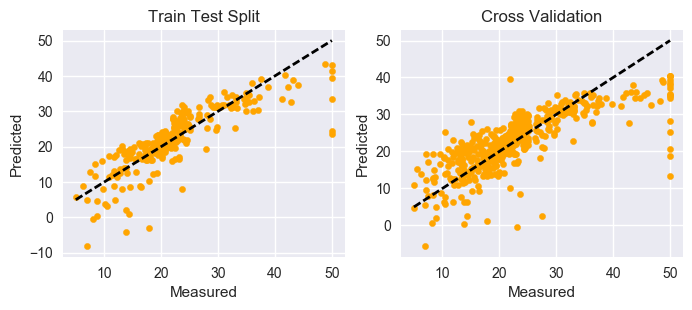

In [40]:
lasso = Lasso(alpha=0.1);

lasso.fit(X_train, y_train);

pred1 = lasso.predict(X_test);
pred2 = cross_val_predict(lasso, df.drop('target', axis=1), df['target'], cv=5)

fig  = plt.figure(figsize=(8, 3), dpi=100);

axes1 = fig.add_subplot(121); 
axes1.scatter(y_test, pred1, c='orange', s=20)
axes1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes1.set_title("Train Test Split")
axes1.set_xlabel('Measured')
axes1.set_ylabel('Predicted')

axes2 = fig.add_subplot(122); 
axes2.scatter(df['target'], pred2, c='orange', s=20)
axes2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes2.set_title("Cross Validation")
axes2.set_xlabel('Measured')
axes2.set_ylabel('Predicted')

print("Train Test Split")
print('MAE:',          mean_absolute_error(y_test, pred1))
print('MSE:',          mean_squared_error( y_test, pred1))
print('RMSE:', np.sqrt(mean_squared_error( y_test, pred1)))
print('\n')
print("Cross Validation")
print('MAE:',          mean_absolute_error(df['target'], pred2))
print('MSE:',          mean_squared_error( df['target'], pred2))
print('RMSE:', np.sqrt(mean_squared_error( df['target'], pred2)))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



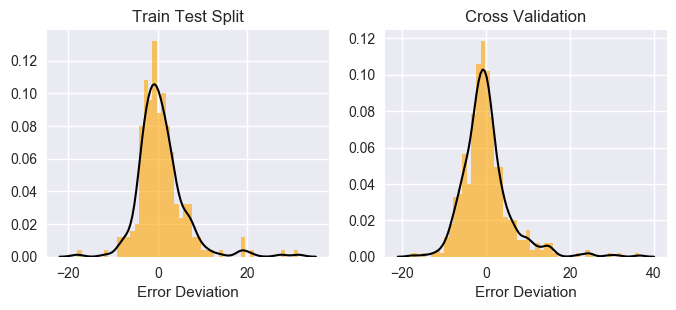

In [98]:
fig  = plt.figure(figsize=(8, 3), dpi=100);

axes1 = fig.add_subplot(121); 
axes2 = fig.add_subplot(122); 

sns.distplot((y_test-pred1),       bins=50, ax=axes1, axlabel='Error Deviation', kde_kws={"color": "k", "lw": 1.5}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});
sns.distplot((df['target']-pred2), bins=50, ax=axes2, axlabel='Error Deviation', kde_kws={"color": "k", "lw": 1.5}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});

axes1.set_title("Train Test Split")
axes2.set_title("Cross Validation")

In [41]:
param_grid = [{'fit_intercept': [True, False],
              'normalize':     [True, False]}]

grid = GridSearchCV(lasso, param_grid, cv=5)

grid.fit(X_train, y_train)

print(grid.cv_results_['mean_test_score'])

grid.best_estimator_

[ 0.65783724  0.71534738  0.70610836  0.70610836]


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

# Polynomial Regression

In [42]:
pnr = Pipeline([('poly', PolynomialFeatures(degree=2)), ('linear', LinearRegression(fit_intercept=False))])

Train Test Split
MAE: 3.273726983
MSE: 28.268953793
RMSE: 5.31685563026


Cross Validation
MAE: 7.60229944581
MSE: 144.20575627
RMSE: 12.0085701176


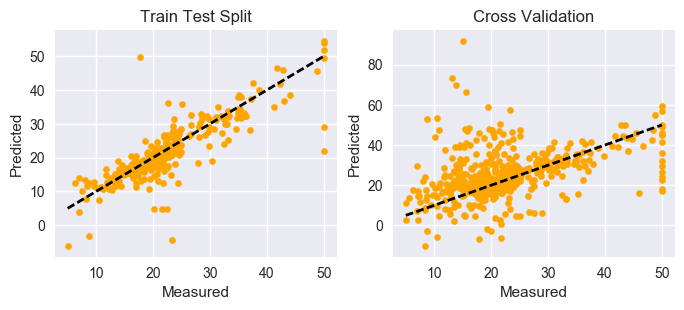

In [43]:
pnr.fit(X_train, y_train);

pred1 = pnr.predict(X_test);
pred2 = cross_val_predict(pnr, df.drop('target', axis=1), df['target'], cv=5)

fig  = plt.figure(figsize=(8, 3), dpi=100);

axes1 = fig.add_subplot(121); 
axes1.scatter(y_test, pred1, c='orange', s=20)
axes1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes1.set_title("Train Test Split")
axes1.set_xlabel('Measured')
axes1.set_ylabel('Predicted')

axes2 = fig.add_subplot(122); 
axes2.scatter(df['target'], pred2, c='orange', s=20)
axes2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes2.set_title("Cross Validation")
axes2.set_xlabel('Measured')
axes2.set_ylabel('Predicted')

print("Train Test Split")
print('MAE:',          mean_absolute_error(y_test, pred1))
print('MSE:',          mean_squared_error( y_test, pred1))
print('RMSE:', np.sqrt(mean_squared_error( y_test, pred1)))
print('\n')
print("Cross Validation")
print('MAE:',          mean_absolute_error(df['target'], pred2))
print('MSE:',          mean_squared_error( df['target'], pred2))
print('RMSE:', np.sqrt(mean_squared_error( df['target'], pred2)))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



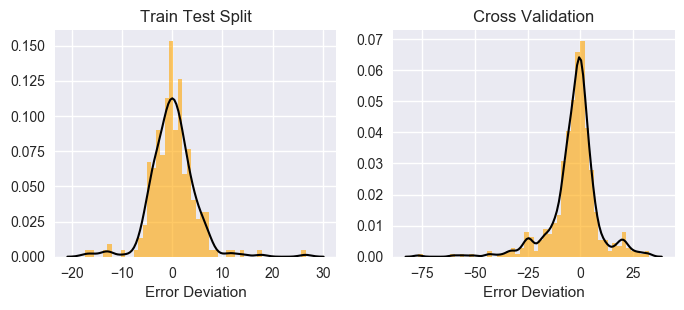

In [101]:
fig  = plt.figure(figsize=(8, 3), dpi=100);

axes1 = fig.add_subplot(121); 
axes2 = fig.add_subplot(122); 

sns.distplot((y_test-pred1),       bins=50, ax=axes1, axlabel='Error Deviation', kde_kws={"color": "k", "lw": 1.5}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});
sns.distplot((df['target']-pred2), bins=50, ax=axes2, axlabel='Error Deviation', kde_kws={"color": "k", "lw": 1.5}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});

axes1.set_title("Train Test Split")
axes2.set_title("Cross Validation")

In [ ]:
param_grid = [{'fit_intercept': [True, False],
              'normalize':     [True, False]}]

grid = GridSearchCV(pnr, param_grid, cv=5)

grid.fit(X_train, y_train)

print(grid.cv_results_['mean_test_score'])

grid.best_estimator_

# K Nearest Neighbors

In [32]:
# Scale features to mean = 1, std = 1

scaler = StandardScaler();

scaler.fit(pd.drop('Category', axis=1));

scaled_mcd = scaler.transform(mcd_noitem.drop('Category', axis=1));

mcd_feat = pd.DataFrame(scaled_mcd, columns=mcd_noitem.columns[1:])
mcd_feat.describe()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,...,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02
mean,5.657867e-18,3.723517e-16,3.779028e-17,-1.035496e-17,-1.009876e-16,1.387779e-17,-1.812653e-16,-2.333603e-16,1.983456e-16,3.057383e-16,...,3.138515e-17,7.088347e-17,9.505217e-16,-3.848417e-16,-1.942890e-16,-1.782762e-16,-1.880974e-16,1.174274e-16,-3.471582e-16,1.011157e-15
std,1.001929e+00,1.001929e+00,1.001929e+00,1.001929e+00,1.001929e+00,1.001929e+00,1.001929e+00,1.001929e+00,1.001929e+00,1.001929e+00,...,1.001929e+00,1.001929e+00,1.001929e+00,1.001929e+00,1.001929e+00,1.001929e+00,1.001929e+00,1.001929e+00,1.001929e+00,1.001929e+00
min,-1.535688e+00,-9.958191e-01,-9.990642e-01,-9.987325e-01,-1.131045e+00,-1.127030e+00,-4.759349e-01,-6.307865e-01,-6.334387e-01,-8.608032e-01,...,-1.679070e+00,-1.678553e+00,-1.042225e+00,-1.037467e+00,-1.027895e+00,-1.169615e+00,-5.521057e-01,-3.245739e-01,-1.234641e+00,-8.883754e-01
25%,-6.599848e-01,-8.391158e-01,-8.315589e-01,-8.270533e-01,-9.427790e-01,-9.483771e-01,-4.759349e-01,-5.733821e-01,-5.645579e-01,-6.741439e-01,...,-6.151588e-01,-6.148831e-01,-1.042225e+00,-1.037467e+00,-8.270189e-01,-8.188651e-01,-4.698671e-01,-3.245739e-01,-8.814334e-01,-8.883754e-01
50%,-1.178831e-01,-2.123028e-01,-2.232500e-01,-2.204536e-01,-1.897144e-01,-2.243644e-01,-4.759349e-01,-2.289554e-01,-2.545942e-01,-5.308938e-01,...,-1.186670e-01,-8.304808e-02,-4.031249e-01,-2.431755e-01,-4.165327e-01,-1.173662e-01,-2.231513e-01,-3.245739e-01,-5.728298e-02,-4.289471e-01
75%,5.493191e-01,5.712135e-01,5.701963e-01,6.036063e-01,7.516164e-01,6.783008e-01,-4.759349e-01,1.154712e-01,9.842011e-02,6.411530e-01,...,4.487522e-01,4.487869e-01,8.750760e-01,5.511162e-01,6.489848e-01,4.964454e-01,6.468383e-02,-1.724527e-01,5.313959e-01,8.344809e-01
max,6.303938e+00,7.309454e+00,7.323306e+00,7.333429e+00,2.634278e+00,2.709298e+00,5.361002e+00,5.970725e+00,5.979121e+00,5.390113e+00,...,3.321312e+00,3.320696e+00,3.431478e+00,3.410566e+00,3.443785e+00,6.459186e+00,6.438176e+00,8.802696e+00,2.886111e+00,3.705908e+00


In [ ]:
knn = KNeighborsClassifier(n_neighbors=1, weights='uniform', algorithm='auto', leaf_size=30, p=1);

knn.fit(X_train,y_train);

pred = knn.predict(X_test);

print(confusion_matrix(y_test,pred));
print(classification_report(y_test,pred));

# Decision Tree

In [ ]:
dtree = DecisionTreeClassifier(criterion='entropy', splitter='random');

dtree.fit(X_train,y_train);

pred = dtree.predict(X_test);

plt.scatter(y_test, pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# Random Forest

In [ ]:
rfc = RandomForestClassifier(criterion='entropy', n_estimators=10, max_features='auto', bootstrap=True);

rfc.fit(X_train,y_train);

pred = dtree.predict(X_test);

plt.scatter(y_test, pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# Support Vector Machine

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(mcd_noitem, mcd_noitem['Category'], test_size=0.5);

svc_model = SVC(kernel='auto');

svc_model.fit(X_train,y_train)

pred = svc_model.predict(X_test);

print(confusion_matrix(y_test,pred));
print(classification_report(y_test,pred));

# K Means Clustering

In [ ]:
kmeans = KMeans(n_clusters=3);

kmeans.fit(wine.drop('class', axis=1));

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB;
gnb = GaussianNB();

gnb.fit(X_train,y_train);

pred = gnb.predict(X_test);

print(confusion_matrix(y_test,pred));
print(classification_report(y_test,pred));

In [ ]:
from sklearn.naive_bayes import MultinomialNB;
mnb = MultinomialNB();

mnb.fit(X_train,y_train);

pred = mnb.predict(X_test);

print(confusion_matrix(y_test,pred));
print(classification_report(y_test,pred));

# Principle Component Analysis

(260, 21)
(260, 2)


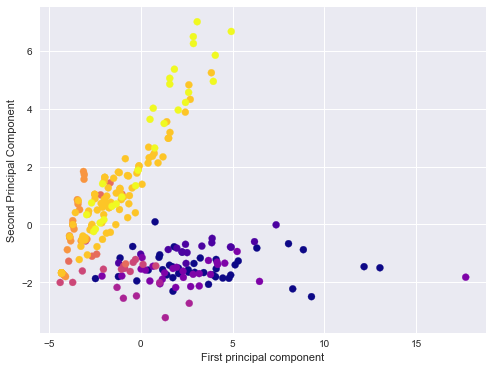

In [45]:
pca = PCA(n_components=2);

pca.fit(scaled_mcd);

x_pca = pca.transform(scaled_mcd);

print(scaled_mcd.shape);
print(x_pca.shape);

plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=mcd_noitem['Category'], cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [50]:
cars.drop('class', axis=1).columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')

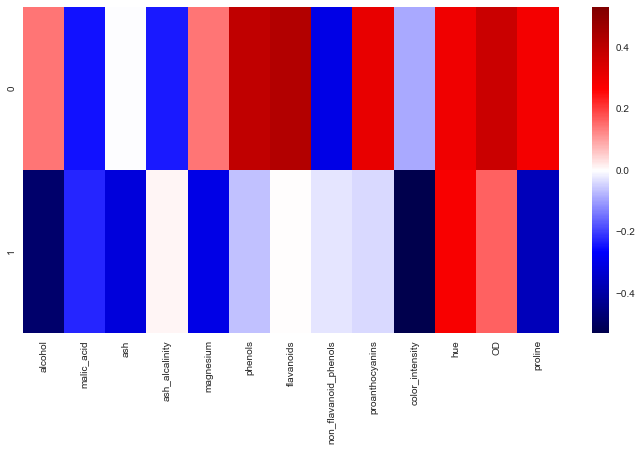

In [236]:
df_comp = pd.DataFrame(pca.components_, columns=['alcohol', 'malic_acid', 'ash', 'ash_alcalinity', 'magnesium', 'phenols', 'flavanoids', 
                            'non_flavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'OD', 'proline'])

plt.figure(figsize=(12,6))

sns.heatmap(df_comp, cmap='seismic')

In [263]:
print(np.shape(np.array([x_pca[:,0],x_pca[:,1]]).transpose()))

(178, 2)


In [268]:
df = pd.DataFrame(data=np.array([x_pca[:,0],x_pca[:,1]]).transpose())

In [279]:
X_train, X_test, y_train, y_test = train_test_split(df, wine['class'], test_size=0.5);

In [280]:
knn = KNeighborsClassifier(n_neighbors=1);

knn.fit(X_train,y_train);

pred = knn.predict(X_test);

print(confusion_matrix(y_test,pred));
print(classification_report(y_test,pred));

[[27  3  0]
 [ 0 35  1]
 [ 0  0 23]]
             precision    recall  f1-score   support

          1       1.00      0.90      0.95        30
          2       0.92      0.97      0.95        36
          3       0.96      1.00      0.98        23

avg / total       0.96      0.96      0.95        89

